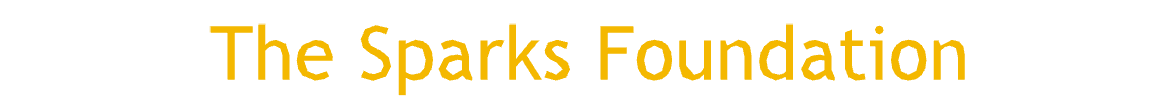

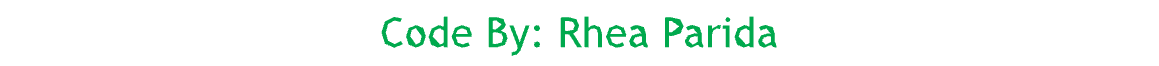

# Task 3- Exploratory Data Analysis - Retail

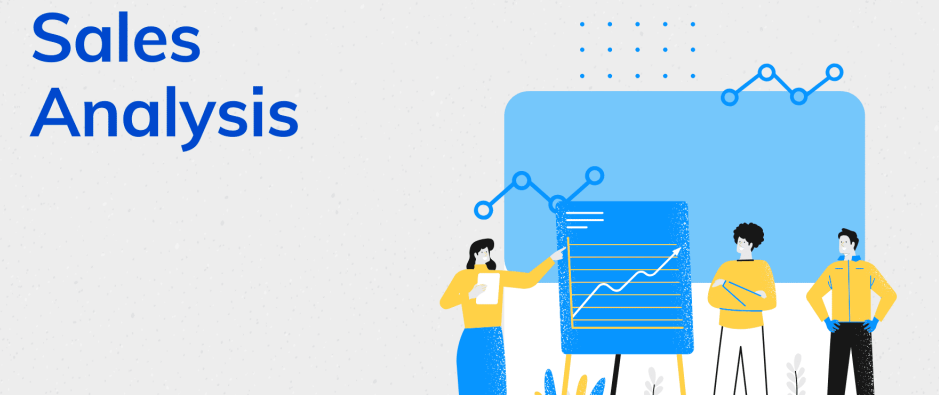

### Importing libraries

In [1]:
# Importing all libraries required in this notebook
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization
import seaborn as sns
import os
%matplotlib inline

### Fetching the dataset

In [3]:
df=pd.read_csv(r"C:\Users\KIIT\Desktop\SS.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Getting to know the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#checking for duplicate values
df.duplicated().sum()

17

In [7]:
# drop the duplicate values
df.drop_duplicates(inplace=True)

### Correlation

In [8]:
#finding the correlation between the features
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


### Visualisation

<AxesSubplot:>

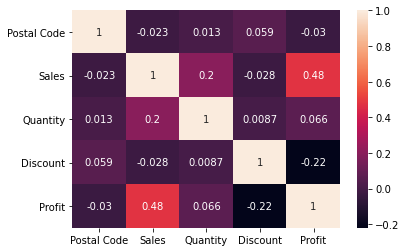

In [9]:
#visualizing the correlation between the features
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

### One by one, studying the features

<AxesSubplot:title={'center':'SHIP MODES'}, xlabel='Ship Mode', ylabel='count'>

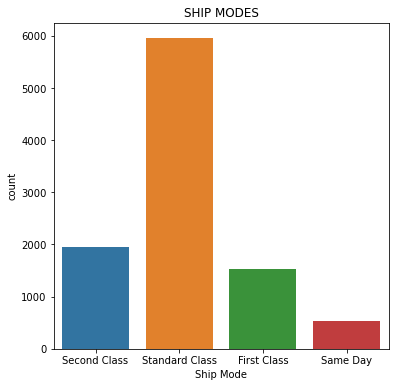

In [10]:
df['Ship Mode'].value_counts()

plt.figure(figsize=(6,6))
plt.title('SHIP MODES')

sns.countplot(x=df['Ship Mode'])

**Standar Class is the most preferred in ship mode**

In [11]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:title={'center':'SEGMENT'}, xlabel='Segment', ylabel='count'>

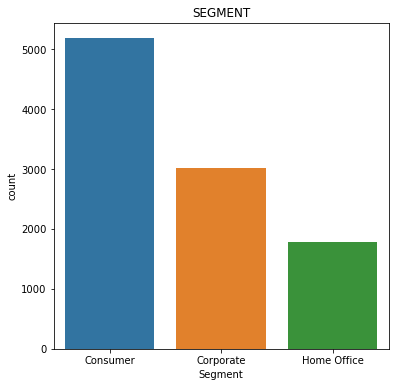

In [12]:
df['Segment'].value_counts()

plt.figure(figsize=(6,6))
plt.title('SEGMENT')

sns.countplot(x=df['Segment'])

**Consumer has maximum value count in segment**

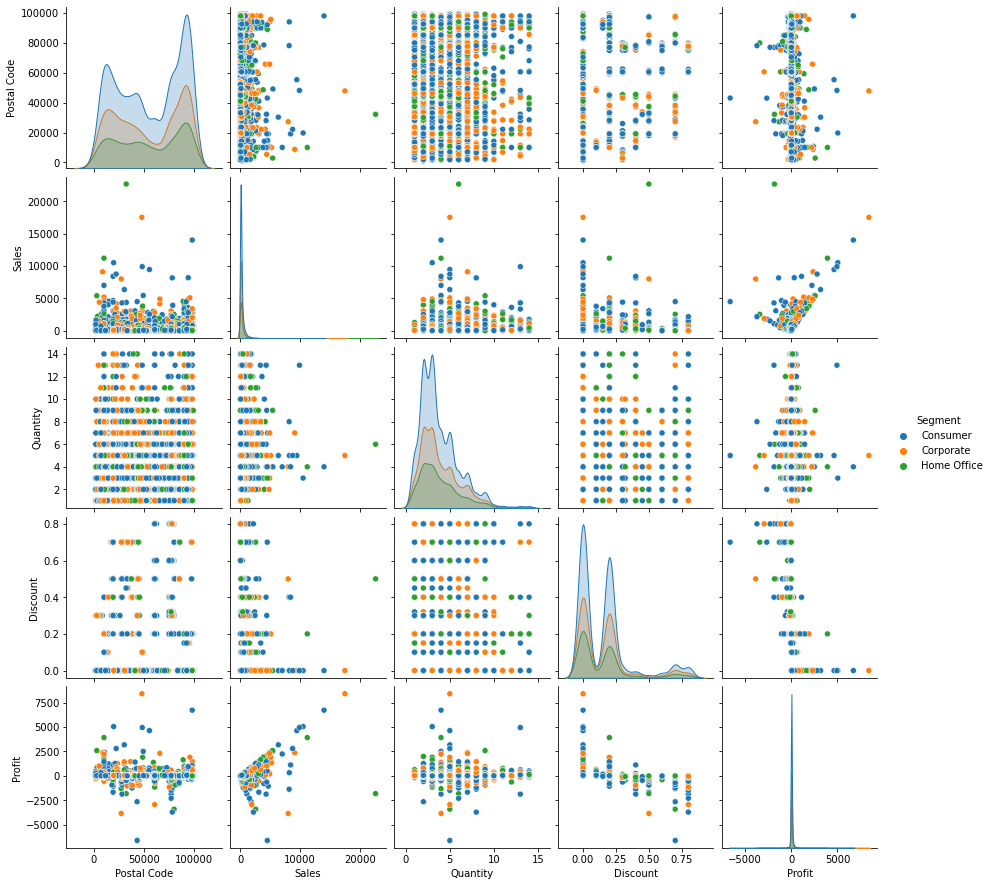

In [13]:
sns.pairplot(df,hue='Segment')

**Profit and sales have positive correlation**

In [15]:
df['Category'].value_counts()



Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

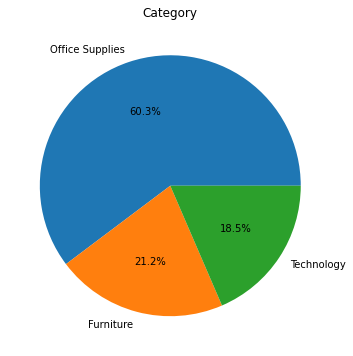

In [16]:
plt.figure(figsize=(6,6))
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()


**Office supplies are maximum in number**

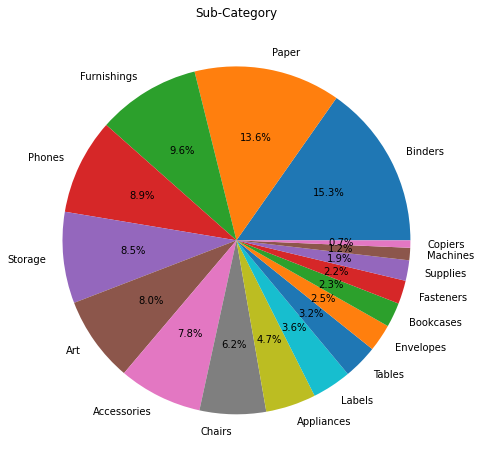

In [17]:
plt.figure(figsize=(8,8))
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

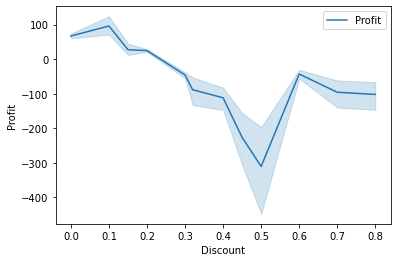

In [18]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

**As the discount is increase, profit decreases**

<AxesSubplot:xlabel='State'>

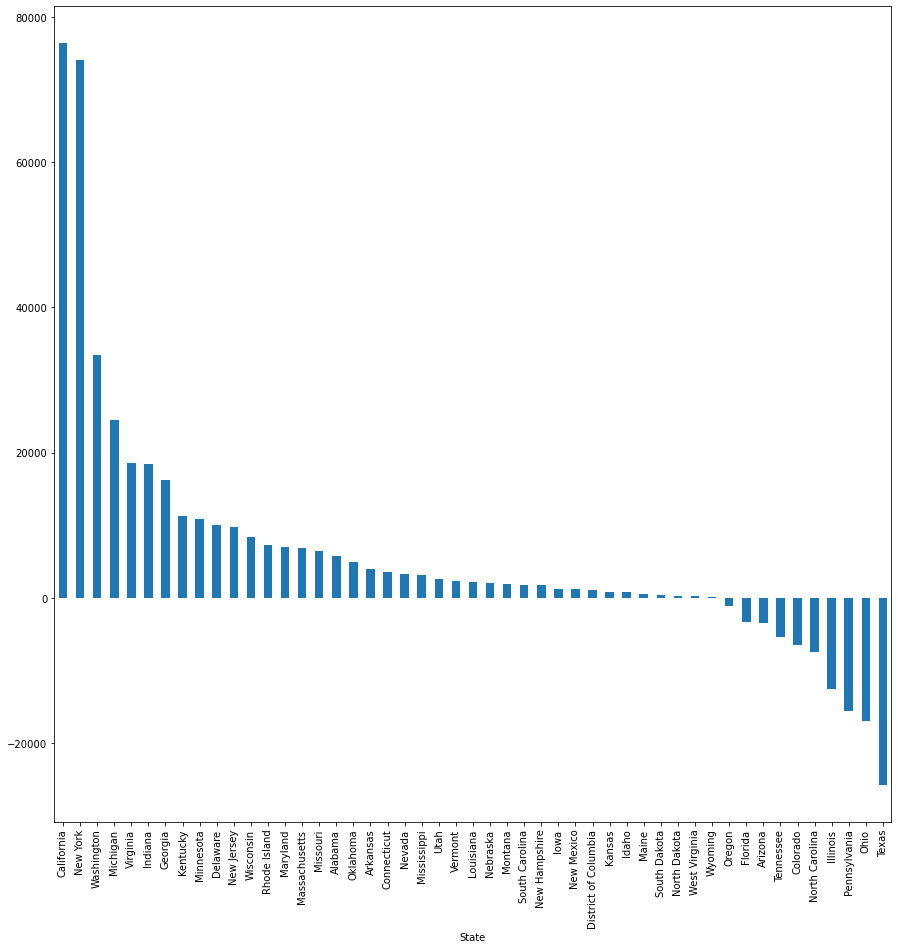

In [19]:
plt.figure(figsize=(15,15))
stpr=df.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.bar()



**California and New York have the highest profits while Texas and Ohio have the least profits.**

## CONCLUSIONS




   - Work more on california and New York as they are places of Maximum sprofit we get from.
   - Discount needs to be taken care of as it is decreasing the profit.
   - Reduce sales of furniture as it has very less profit compared to sales.
   - The Profit generated by office supplies category is more, but the sales for office suppliers are less.
     So, we have to work on increasing the sales for office supplies category



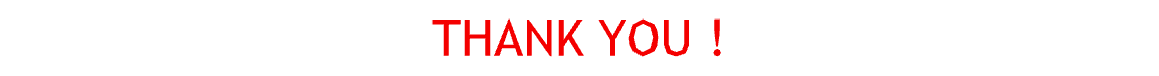